In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from importlib import reload

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [138]:
#get the column name of data described in the dataset, ignore 0th row.
#dataset = pd.read_csv('C:/Users/ksmin/data_Science/dataset/bmi_data_lab2.csv', names= ['gender', 'age', 'height','weight','BMI'], skiprows=1)
#dataset.head(20)

# File path
file_path = r'C:/Users/ksmin/data_Science/dataset/bmi_data_lab2.csv'

# Read CSV file
try:
    dataset = pd.read_csv(file_path)
    print("File read successfully.")
    # Print the dataframe
    print(dataset.head())
except FileNotFoundError:
    print("File not found.")
except Exception as e:
    print("An error occurred while reading the file:", e)

File read successfully.
      Sex  Age  Height (Inches)  Weight (Pounds)  BMI
0  Female   21         65.78331         112.9925  2.0
1  Female   35              NaN         136.4873  3.0
2  Female   27         69.39874         153.0269  3.0
3    Male   24         68.21660         142.3354  3.0
4  Female   18         67.78781         144.2971  3.0


In [139]:
#Print dataset feature names and data types
#150 rows, 5 columns, null values were confirmed in height and BMI.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              150 non-null    object 
 1   Age              150 non-null    int64  
 2   Height (Inches)  146 non-null    float64
 3   Weight (Pounds)  150 non-null    float64
 4   BMI              145 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.0+ KB


In [140]:
# Print dataset statistical data
print("\nDataset statistical data:")
print(dataset.describe())


Dataset statistical data:
              Age  Height (Inches)  Weight (Pounds)         BMI
count  150.000000       146.000000       150.000000  145.000000
mean    26.413333        80.133994       129.703405    2.751724
std      5.206071        96.579662        88.179891    0.449244
min     18.000000      -130.926162      -161.994913    1.000000
25%     22.000000        66.599598       120.391125    3.000000
50%     26.500000        68.219095       128.538050    3.000000
75%     31.000000        69.432848       136.170900    3.000000
max     35.000000       665.465059      1110.621115    3.000000


In [141]:
#Identify what a dataset is like upper 10
dataset.head(10)

,Sex,Age,Height (Inches),Weight (Pounds),BMI
0,Female,21,65.78331,112.9925,2.0
1,Female,35,NaN,136.4873,3.0
2,Female,27,69.39874,153.0269,3.0
3,Male,24,68.21660,142.3354,3.0
4,Female,18,67.78781,144.2971,3.0
5,Female,22,68.69784,123.3024,2.0
6,Male,35,69.80204,141.4947,NaN
7,Male,19,70.01472,136.4623,3.0
8,Female,28,67.90265,112.3723,2.0
9,Male,25,NaN,120.6672,3.0


In [142]:
#Identify what a dataset is like the bottom 10
dataset.tail(10)

,Sex,Age,Height (Inches),Weight (Pounds),BMI
140,Male,32,69.51862,136.206800,3.0
141,Male,25,65.18437,113.398900,3.0
142,Female,27,68.00869,125.328700,3.0
143,Female,29,68.33840,127.584600,3.0
144,Male,22,65.18417,107.156400,2.0
145,Female,20,68.26209,116.458800,2.0
146,Female,28,68.56865,133.840200,3.0
147,Female,30,64.49675,1110.621115,3.0
148,Male,19,68.71053,130.756800,3.0
149,Male,25,68.89148,137.757100,3.0


In [143]:
#check column dataset
dataset.columns

Index(['Sex', 'Age', 'Height (Inches)', 'Weight (Pounds)', 'BMI'], dtype='object')

In [144]:
#check dataset index
dataset.index

RangeIndex(start=0, stop=150, step=1)

In [145]:
#check how many NaN each column.
dataset.isna().sum()

Sex                0
Age                0
Height (Inches)    4
Weight (Pounds)    0
BMI                5
dtype: int64

[1, 34, 110, 0]


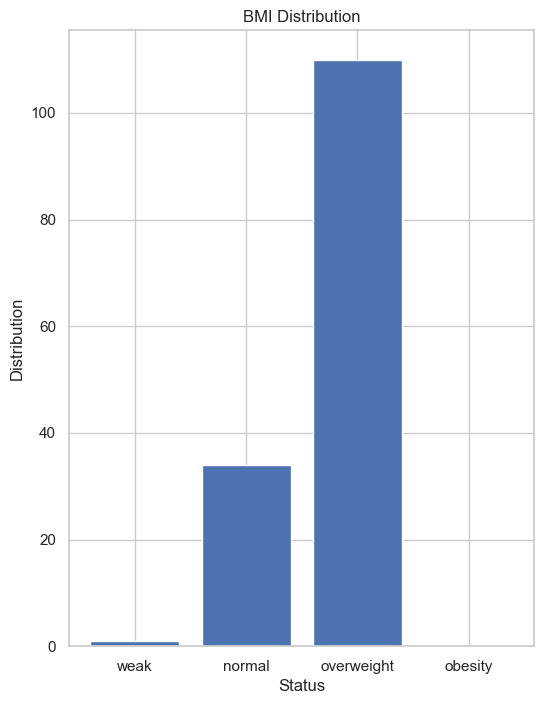

In [146]:
#Plot height & weight histograms (bins=10) for each BMI value
status = ['weak', 'normal', 'overweight', 'obesity']
status_indices = [0]*4

for num in dataset['BMI']:
    if num == 1:
        status_indices[0] += 1
    elif num == 2:
        status_indices[1] += 1
    elif num == 3:
        status_indices[2] += 1
    elif num == 4:
        status_indices[3] += 1
    else:
        continue

print(status_indices)

plt.figure(figsize=(6, 8))
plt.title("BMI Distribution")
plt.xlabel("Status")
plt.ylabel("Distribution")
plt.bar(status, status_indices)
plt.show()


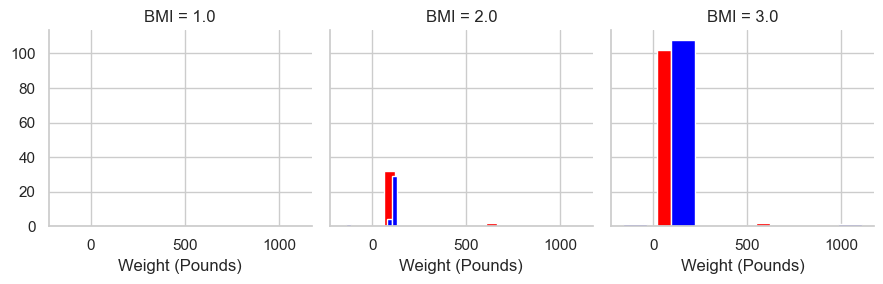

In [147]:
# Draw a histogram using seaborn.FacetGrid based on BMI values
grid = sns.FacetGrid(dataset, col="BMI", col_wrap=3)
grid.map(plt.hist, 'Height (Inches)', bins=10, color="red")
grid.map(plt.hist, "Weight (Pounds)", bins=10, color="blue")
plt.show()

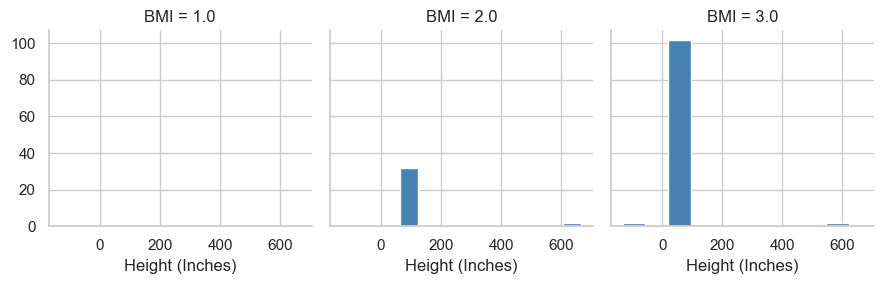

In [148]:
# Histogram for Height (Inches) for each BMI value
g = sns.FacetGrid(dataset, col="BMI", margin_titles=True)
g.map(plt.hist, "Height (Inches)", bins=10, color="steelblue")
plt.show()

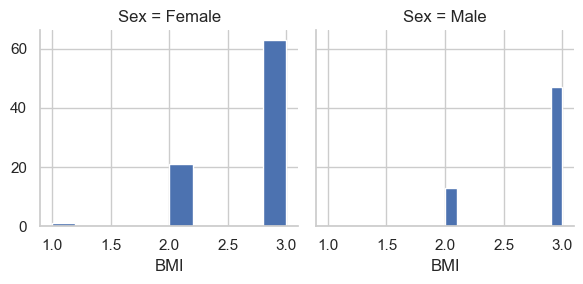

In [149]:
#Print BMI values each Sex 0 -> Female, 1 -> Male
bins = 10
facet = sns.FacetGrid(dataset, col='Sex')
facet = facet.map(plt.hist, 'BMI', bins=bins)

In [150]:
# Plot height & weight histograms for each BMI value
sns.set(style="whitegrid")

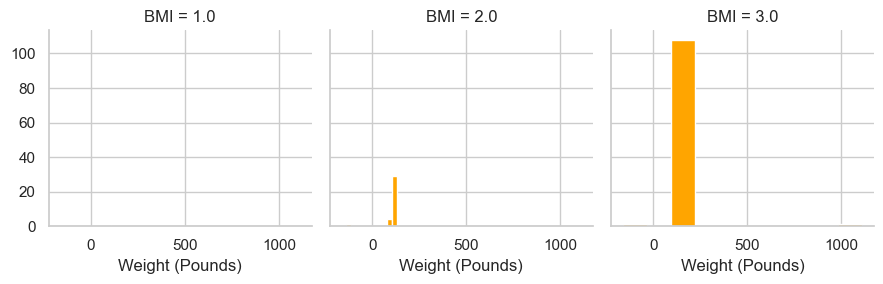

In [151]:
# Histogram for Weight (Pounds) for each BMI value
g = sns.FacetGrid(dataset, col="BMI", margin_titles=True)
g.map(plt.hist, "Weight (Pounds)", bins=10, color="orange")
plt.show()

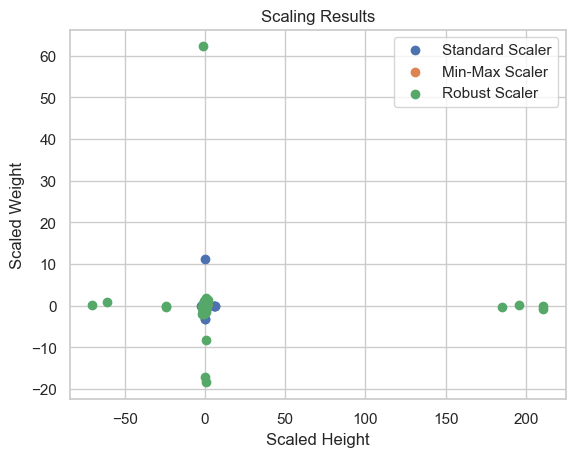

In [152]:

# Plot scaling results for height and weight
scalers = [('Standard Scaler', StandardScaler()),
           ('Min-Max Scaler', MinMaxScaler()),
           ('Robust Scaler', RobustScaler())]

for scaler_name, scaler in scalers:
    scaled_data = scaler.fit_transform(dataset[['Height (Inches)', 'Weight (Pounds)']])
    df_scaled = pd.DataFrame(scaled_data, columns=['Scaled_Height', 'Scaled_Weight'])
    plt.scatter(df_scaled['Scaled_Height'], df_scaled['Scaled_Weight'], label=scaler_name)

plt.xlabel('Scaled Height')
plt.ylabel('Scaled Weight')
plt.title('Scaling Results')
plt.legend()
plt.show()

In [153]:
# Identify missing values
missing_values = dataset.isnull().sum()
print("Number of rows with missing values:", dataset.isnull().any(axis=1).sum())
print("Number of missing values for each column:")
print(missing_values)


Number of rows with missing values: 9
Number of missing values for each column:
Sex                0
Age                0
Height (Inches)    4
Weight (Pounds)    0
BMI                5
dtype: int64


In [154]:
#Convert a string to a number
label_encoder = LabelEncoder()
dataset['Sex'] = label_encoder.fit_transform(dataset['Sex'])

#One-hot encoding to 'sex' column
onehot_encoder = OneHotEncoder()
gender_encoded = onehot_encoder.fit_transform(dataset['Sex'].values.reshape(-1,1))

#save df dataFrame, Sex column has Female -> 1.0, Male -> 0.0
gender_encoded_df = pd.DataFrame(gender_encoded.toarray())
gender_encoded_df.drop(columns=[1], inplace=True)
gender_encoded_df.rename(columns={0:'Sex'}, inplace=True)
df = pd.concat([gender_encoded_df, dataset.iloc[:,1:]],axis=1)
#1.0 -> female, 0.0 : male
print(df.head(20))

#dataset has Female, Male variables.
#df has 1.0, 0.0 variables in Sex column


    Sex  Age  Height (Inches)  Weight (Pounds)  BMI
0   1.0   21        65.783310         112.9925  2.0
1   1.0   35              NaN         136.4873  3.0
2   1.0   27        69.398740         153.0269  3.0
3   0.0   24        68.216600         142.3354  3.0
4   1.0   18        67.787810         144.2971  3.0
5   1.0   22        68.697840         123.3024  2.0
6   0.0   35        69.802040         141.4947  NaN
7   0.0   19        70.014720         136.4623  3.0
8   1.0   28        67.902650         112.3723  2.0
9   0.0   25              NaN         120.6672  3.0
10  0.0   34         0.000000         127.4516  NaN
11  1.0   28        67.623330         114.1430  2.0
12  0.0   21        68.302480         125.6107  3.0
13  0.0   25        67.116560         122.4618  3.0
14  1.0   27        68.279670         116.0866  2.0
15  0.0   23        71.091600         139.9975  3.0
16  0.0   20        66.461000         129.5023  3.0
17  1.0   31      -104.420555         142.9733  3.0
18  0.0   19

In [155]:
# Print # of rows with NAN, and # of NAN for each column in Height.
h_indices = []
for index, num in df['Height (Inches)'].items():
    if num <= 0 or num>100 or math.isnan(num):
        h_indices.append(index)
        df.at[index,'Height (Inches)'] = np.nan
print(h_indices) 

[1, 9, 10, 17, 33, 41, 47, 69, 87, 90, 111, 116]


In [156]:
#Print # of rows with NAN, and # of NAN for each column in Weight.
w_indices = []
for index, num in df['Weight (Pounds)'].items():
    if num <=0 or num > 200:
        w_indices.append(index)
        df.at[index,'Weight (Pounds)'] = np.nan
print(w_indices) 

[48, 104, 129, 147]


In [157]:
# Remove rows with missing values
df_cleaned = df.dropna()

# Alternatively, fill missing values with mean, median, or using ffill / bfill methods
# Example: fill missing values with mean
df_filled_mean = df.fillna(df.mean())

# Example: fill missing values with median
df_filled_median = df.fillna(df.median())

# Example: fill missing values with forward fill (ffill)
df_filled_ffill = df.fillna(method='ffill')

# Example: fill missing values with backward fill (bfill)
df_filled_bfill = df.fillna(method='bfill')

# Check the cleaned datasets
print("\nCleaned dataset (removed rows with missing values):")
print(df_cleaned.head())

print("\nDataset with missing values filled using mean:")
print(df_filled_mean.head())

print("\nDataset with missing values filled using median:")
print(df_filled_median.head())

print("\nDataset with missing values filled using forward fill:")
print(df_filled_ffill.head())

print("\nDataset with missing values filled using backward fill:")
print(df_filled_bfill.head())


Cleaned dataset (removed rows with missing values):
   Sex  Age  Height (Inches)  Weight (Pounds)  BMI
0  1.0   21         65.78331         112.9925  2.0
2  1.0   27         69.39874         153.0269  3.0
3  0.0   24         68.21660         142.3354  3.0
4  1.0   18         67.78781         144.2971  3.0
5  1.0   22         68.69784         123.3024  2.0

Dataset with missing values filled using mean:
   Sex  Age  Height (Inches)  Weight (Pounds)  BMI
0  1.0   21        65.783310         112.9925  2.0
1  1.0   35        68.045536         136.4873  3.0
2  1.0   27        69.398740         153.0269  3.0
3  0.0   24        68.216600         142.3354  3.0
4  1.0   18        67.787810         144.2971  3.0

Dataset with missing values filled using median:
   Sex  Age  Height (Inches)  Weight (Pounds)  BMI
0  1.0   21        65.783310         112.9925  2.0
1  1.0   35        68.219095         136.4873  3.0
2  1.0   27        69.398740         153.0269  3.0
3  0.0   24        68.216600     

C:\Users\ksmin\AppData\Local\Temp\ipykernel_8096\3106756288.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled_ffill = df.fillna(method='ffill')
C:\Users\ksmin\AppData\Local\Temp\ipykernel_8096\3106756288.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled_bfill = df.fillna(method='bfill')


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              150 non-null    float64
 1   Age              150 non-null    int64  
 2   Height (Inches)  138 non-null    float64
 3   Weight (Pounds)  146 non-null    float64
 4   BMI              145 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [159]:
#case 1. drop max num 12(height) feature of dataFrame. 
df_cleaned.info()  

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              132 non-null    float64
 1   Age              132 non-null    int64  
 2   Height (Inches)  132 non-null    float64
 3   Weight (Pounds)  132 non-null    float64
 4   BMI              132 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.2 KB


In [160]:
#mean, median, ffill, bfill has all data not NaN
df_filled_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              150 non-null    float64
 1   Age              150 non-null    int64  
 2   Height (Inches)  150 non-null    float64
 3   Weight (Pounds)  150 non-null    float64
 4   BMI              150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


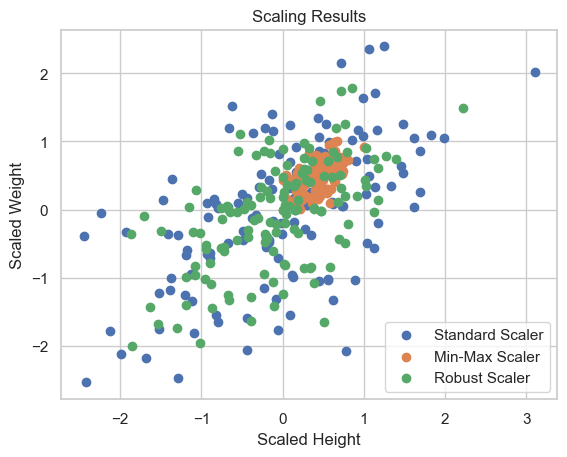

In [161]:
# Plot scaling results for height and weight after convert missing,outlier data to NaN.
scalers = [('Standard Scaler', StandardScaler()),
           ('Min-Max Scaler', MinMaxScaler()),
           ('Robust Scaler', RobustScaler())]

for scaler_name, scaler in scalers:
    scaled_data = scaler.fit_transform(df[['Height (Inches)', 'Weight (Pounds)']])
    df_scaled = pd.DataFrame(scaled_data, columns=['Scaled_Height', 'Scaled_Weight'])
    plt.scatter(df_scaled['Scaled_Height'], df_scaled['Scaled_Weight'], label=scaler_name)

plt.xlabel('Scaled Height')
plt.ylabel('Scaled Weight')
plt.title('Scaling Results')
plt.legend()
plt.show()

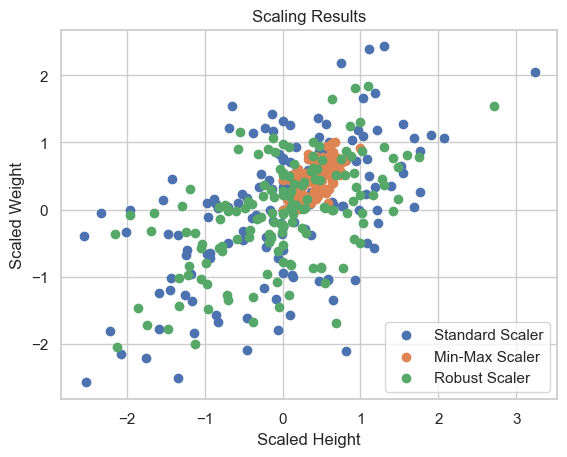

In [162]:
# Plot scaling results for height and weight after mean
scalers = [('Standard Scaler', StandardScaler()),
           ('Min-Max Scaler', MinMaxScaler()),
           ('Robust Scaler', RobustScaler())]

for scaler_name, scaler in scalers:
    scaled_data = scaler.fit_transform(df_filled_mean[['Height (Inches)', 'Weight (Pounds)']])
    df_scaled = pd.DataFrame(scaled_data, columns=['Scaled_Height', 'Scaled_Weight'])
    plt.scatter(df_scaled['Scaled_Height'], df_scaled['Scaled_Weight'], label=scaler_name)

plt.xlabel('Scaled Height')
plt.ylabel('Scaled Weight')
plt.title('Scaling Results')
plt.legend()
plt.show()

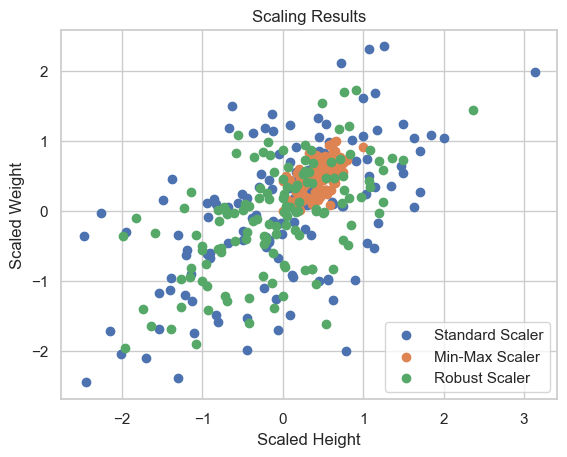

In [163]:
# Plot scaling results for height and weight after drop NaN
scalers = [('Standard Scaler', StandardScaler()),
           ('Min-Max Scaler', MinMaxScaler()),
           ('Robust Scaler', RobustScaler())]

for scaler_name, scaler in scalers:
    scaled_data = scaler.fit_transform(df_cleaned[['Height (Inches)', 'Weight (Pounds)']])
    df_scaled = pd.DataFrame(scaled_data, columns=['Scaled_Height', 'Scaled_Weight'])
    plt.scatter(df_scaled['Scaled_Height'], df_scaled['Scaled_Weight'], label=scaler_name)

plt.xlabel('Scaled Height')
plt.ylabel('Scaled Weight')
plt.title('Scaling Results')
plt.legend()
plt.show()

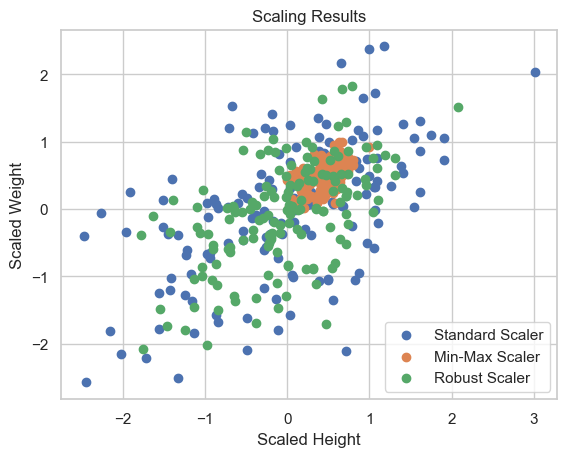

In [164]:
# Plot scaling results for height and weight after drop NaN
scalers = [('Standard Scaler', StandardScaler()),
           ('Min-Max Scaler', MinMaxScaler()),
           ('Robust Scaler', RobustScaler())]

for scaler_name, scaler in scalers:
    scaled_data = scaler.fit_transform(df_filled_bfill[['Height (Inches)', 'Weight (Pounds)']])
    df_scaled = pd.DataFrame(scaled_data, columns=['Scaled_Height', 'Scaled_Weight'])
    plt.scatter(df_scaled['Scaled_Height'], df_scaled['Scaled_Weight'], label=scaler_name)

plt.xlabel('Scaled Height')
plt.ylabel('Scaled Weight')
plt.title('Scaling Results')
plt.legend()
plt.show()

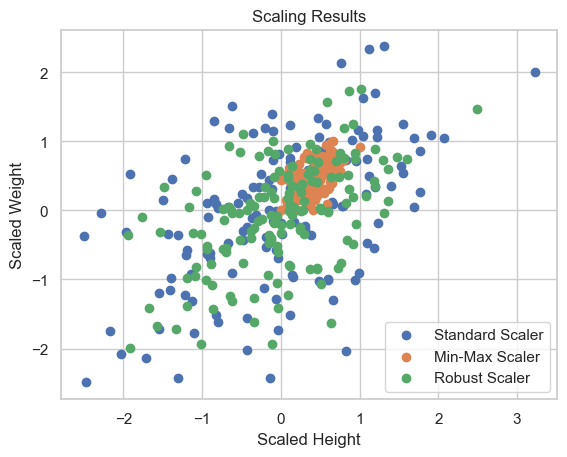

In [165]:
# Plot scaling results for height and weight after drop NaN
scalers = [('Standard Scaler', StandardScaler()),
           ('Min-Max Scaler', MinMaxScaler()),
           ('Robust Scaler', RobustScaler())]

for scaler_name, scaler in scalers:
    scaled_data = scaler.fit_transform(df_filled_ffill[['Height (Inches)', 'Weight (Pounds)']])
    df_scaled = pd.DataFrame(scaled_data, columns=['Scaled_Height', 'Scaled_Weight'])
    plt.scatter(df_scaled['Scaled_Height'], df_scaled['Scaled_Weight'], label=scaler_name)

plt.xlabel('Scaled Height')
plt.ylabel('Scaled Weight')
plt.title('Scaling Results')
plt.legend()
plt.show()

In [166]:
#Show StandardScaler normalization data case Drop dataset
X = df_cleaned.iloc[:,0:4].values
s_x = StandardScaler().fit_transform(X)
s_x

array([[ 0.84515425, -1.01115731, -1.21469603, -1.19759885],
       [ 0.84515425,  0.15624297,  0.72158589,  2.11574955],
       [-1.18321596, -0.42745717,  0.08847827,  1.23089391],
       [ 0.84515425, -1.59485744, -0.14116477,  1.39324918],
       [ 0.84515425, -0.8165906 ,  0.34621146, -0.3443254 ],
       [-1.18321596, -1.40029073,  1.05148052,  0.74482127],
       [ 0.84515425,  0.35080968, -0.07966099, -1.24892817],
       [ 0.84515425,  0.35080968, -0.22925378, -1.10238055],
       [-1.18321596, -1.01115731,  0.13447221, -0.15328464],
       [-1.18321596, -0.23289046, -0.50065983, -0.41389558],
       [ 0.84515425,  0.15624297,  0.12225607, -0.94152329],
       [-1.18321596, -0.62202388,  1.62821504,  1.03740338],
       [-1.18321596, -1.20572402, -0.85175195,  0.16879404],
       [-1.18321596, -1.40029073,  1.70251336,  0.86401588],
       [ 0.84515425,  1.12907653, -0.49282994, -0.28287422],
       [-1.18321596, -0.8165906 , -0.11653969,  1.14360427],
       [ 0.84515425,  1.

In [167]:
#Show MinMaxScaler normalize data (0~1) case drop dataset
m_x = MinMaxScaler().fit_transform(X)
m_x

array([[1.        , 0.17647059, 0.22505704, 0.26019699],
       [1.        , 0.52941176, 0.5701956 , 0.95048347],
       [0.        , 0.35294118, 0.45734537, 0.76613706],
       [1.        , 0.        , 0.41641194, 0.79996134],
       [1.        , 0.23529412, 0.50328582, 0.43796372],
       [0.        , 0.05882353, 0.62899869, 0.66487111],
       [1.        , 0.58823529, 0.42737487, 0.24950329],
       [1.        , 0.58823529, 0.40071024, 0.28003429],
       [0.        , 0.17647059, 0.46554371, 0.4777642 ],
       [0.        , 0.41176471, 0.35233263, 0.42346982],
       [1.        , 0.52941176, 0.4633662 , 0.31354649],
       [0.        , 0.29411765, 0.73180052, 0.72582621],
       [0.        , 0.11764706, 0.28975113, 0.54486447],
       [0.        , 0.05882353, 0.74504406, 0.68970352],
       [1.        , 0.82352941, 0.35372829, 0.45076615],
       [0.        , 0.23529412, 0.42080131, 0.74795157],
       [1.        , 0.82352941, 0.5205617 , 0.78689338],
       [1.        , 0.76470588,

In [168]:
#Show RobustScaler data case Drop dataset
max_x = RobustScaler().fit_transform(X)
max_x


array([[ 0.00000000e+00, -5.55555556e-01, -1.01223748e+00,
        -9.93228750e-01],
       [ 0.00000000e+00,  1.11111111e-01,  4.90224252e-01,
         1.54737971e+00],
       [-1.00000000e+00, -2.22222222e-01, -1.03684541e-03,
         8.68890327e-01],
       [ 0.00000000e+00, -8.88888889e-01, -1.79228807e-01,
         9.93381056e-01],
       [ 0.00000000e+00, -4.44444444e-01,  1.98951726e-01,
        -3.38955946e-01],
       [-1.00000000e+00, -7.77777778e-01,  7.46206631e-01,
         4.96179670e-01],
       [ 0.00000000e+00,  2.22222222e-01, -1.31504828e-01,
        -1.03258704e+00],
       [ 0.00000000e+00,  2.22222222e-01, -2.47581646e-01,
        -9.20217289e-01],
       [-1.00000000e+00, -5.55555556e-01,  3.46522464e-02,
        -1.92469761e-01],
       [-1.00000000e+00, -1.11111111e-01, -4.58179703e-01,
        -3.92300956e-01],
       [ 0.00000000e+00,  1.11111111e-01,  2.51731106e-02,
        -7.96875198e-01],
       [-1.00000000e+00, -3.33333333e-01,  1.19372490e+00,
      

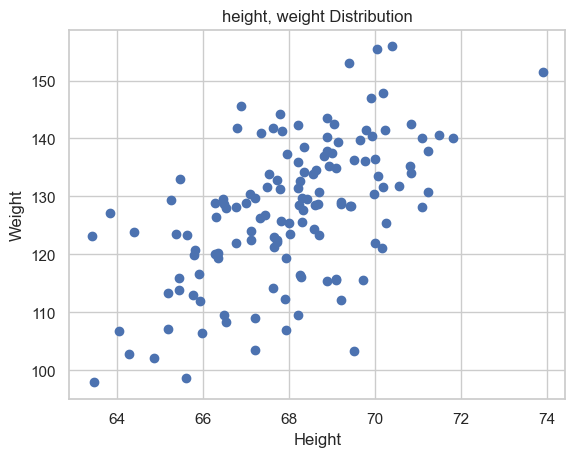

In [169]:
#Case. Clean dataset
plt.title("height, weight Distribution")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.scatter(df['Height (Inches)'],df['Weight (Pounds)'])
plt.show()

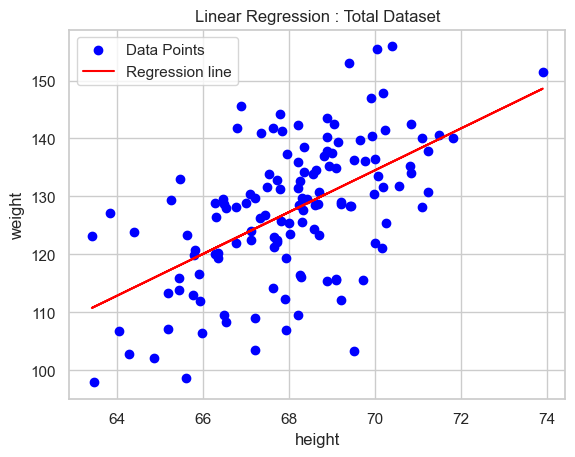

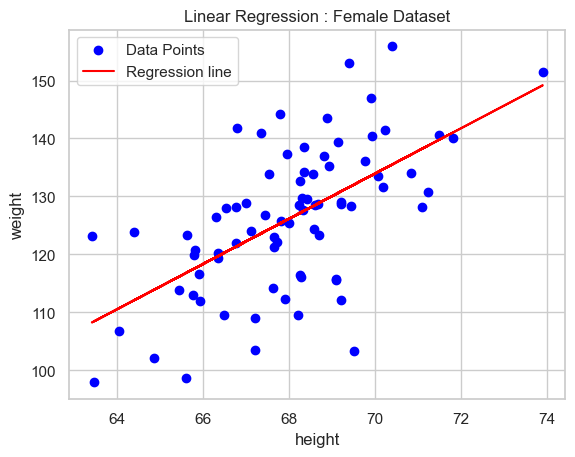

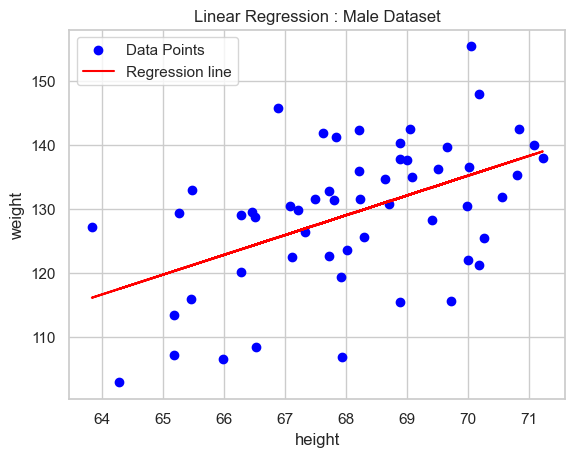

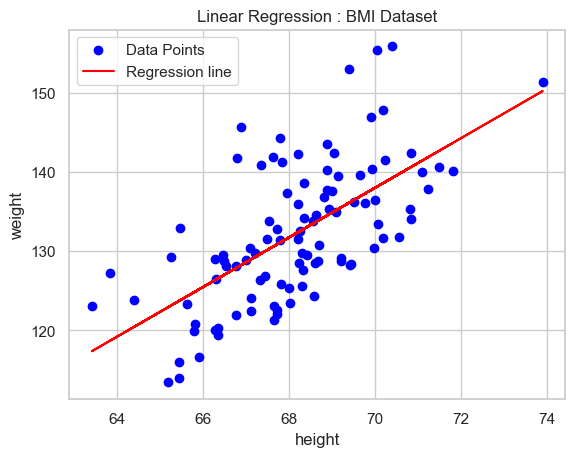

In [170]:
#Linear regression model.
def compute_regression_equation(df, name):
    clean_df = df.dropna()
    if clean_df.empty:
        return None, None  # return None if no data
    X = clean_df[['Height (Inches)']]
    y = clean_df[['Weight (Pounds)']]
    model = LinearRegression()
    model.fit(X, y)

    plt.scatter(X,y, color = 'blue', label = 'Data Points')
    plt.plot(X, model.predict(X), color = 'red', label = 'Regression line')
    plt.title("Predicted distribution") 
    plt.xlabel('height')
    plt.ylabel('weight')
    plt.title('Linear Regression : {}' .format(name))
    plt.legend()

    plt.show()
    return model.intercept_, model.coef_[0], model

intercept, slope, model = compute_regression_equation(df,"Total Dataset")
if intercept is None or slope is None:
    print("Entire dataset is empty or insufficient data.")
else:
    # Compute linear regression equations for the entire dataset and for groups divided by gender and BMI
    female_df = df[df['Sex'] == 1.0].dropna(subset=['Height (Inches)', 'Weight (Pounds)']) #Female
    male_df = df[df['Sex'] == 0.0].dropna(subset=['Height (Inches)', 'Weight (Pounds)']) #Male
    obesity_df = df[df['BMI'] == 3.0].dropna(subset=['Height (Inches)', 'Weight (Pounds)'])  # Adjust accordingly for actual BMI categories

    intercept_female, slope_female, model_female = compute_regression_equation(female_df, "Female Dataset")
    intercept_male, slope_male, model_male = compute_regression_equation(male_df, "Male Dataset")
    intercept_obesity, slope_obesity, model_obesity = compute_regression_equation(obesity_df, "BMI Dataset")

In [171]:
#check Outlier, missing data in height, weight
def Find_h_w(df):
    h_indices = []
    for index, num in df['Height (Inches)'].items():
        if num <= 0 or num>100 or math.isnan(num):
            h_indices.append(index)
            df.at[index,'Height (Inches)'] = np.nan

    w_indices = []
    for index, num in df['Weight (Pounds)'].items():
        if num <=0 or num > 200:
            w_indices.append(index)
            df.at[index,'Weight (Pounds)'] = np.nan
    return h_indices, w_indices


In [177]:
#Store parts that require linear regression for each data set
def Save_linear_regression(df,intercept, slope,model,h_indices,w_indices):
    if not w_indices:  # w_indices empty
        return  # break 
    height = []
    height = df.loc[w_indices, 'Height (Inches)'].values.reshape(-1, 1)
    height = np.array(height).reshape(-1,1) 

    w_predict = model.predict(height) 
    for i, index in enumerate(w_indices):
        df.at[index,'Weight (Pounds)'] = w_predict[i]
    #Predict data, y data is weight. x data is height.
    # y = ax + b, x = (y-b)/a
    weight = []
    weight = df.loc[h_indices,'Weight (Pounds)'].values
    weight = np.array(weight)

    h_predict=(weight-intercept)/slope

    h_predict = h_predict.reshape(-1,1)
    #2차원 배열 w_predict
    for i, index in enumerate(h_indices):
        df.at[index,'Height (Inches)'] = h_predict[i]

#initialize female, male, obesity dataset have NaN, and height, weight NaN index
#initialize female, male, obesity dataset have NaN, and height, weight NaN index
female_df = df.loc[df['Sex'] == 1.0]
if not female_df.empty:
    h_indices_female,w_indices_female = Find_h_w(female_df)

male_df = df.loc[df['Sex'] == 0.0]
if not male_df.empty:
    h_indices_male,w_indices_male = Find_h_w(male_df)

obesity_df = df.loc[df['BMI'] == 3.0]
if not obesity_df.empty:
    h_indices_obesity,w_indices_obesity = Find_h_w(obesity_df)


Save_linear_regression(df,intercept, slope,model,h_indices,w_indices)
Save_linear_regression(female_df,intercept_female, slope_female, model_female, h_indices_female,w_indices_female)
Save_linear_regression(male_df,intercept_male, slope_male,model_male,h_indices_male,w_indices_male)
Save_linear_regression(obesity_df,intercept_obesity, slope_obesity,model_obesity,h_indices_obesity,w_indices_obesity)

c:\Users\ksmin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


c:\Users\ksmin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


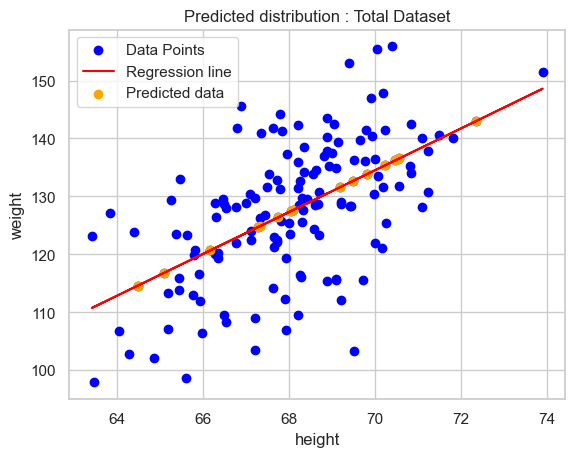

c:\Users\ksmin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[[70.54875459]
 [66.17083724]
 [68.04829329]
 [72.34363401]
 [70.47547613]
 [67.33086731]
 [65.10591972]
 [67.29511362]
 [69.193961  ]
 [70.56552451]
 [68.0911313 ]
 [69.494934  ]
 [69.82117   ]
 [67.75551   ]
 [70.241     ]
 [64.49675   ]]

[[136.4873    ]
 [120.6672    ]
 [127.4516    ]
 [142.9733    ]
 [136.2225    ]
 [124.8591    ]
 [116.819     ]
 [124.7299    ]
 [131.5916    ]
 [136.5479    ]
 [127.6064    ]
 [132.6792    ]
 [133.85809072]
 [126.39359444]
 [135.37519395]
 [114.61769624]]


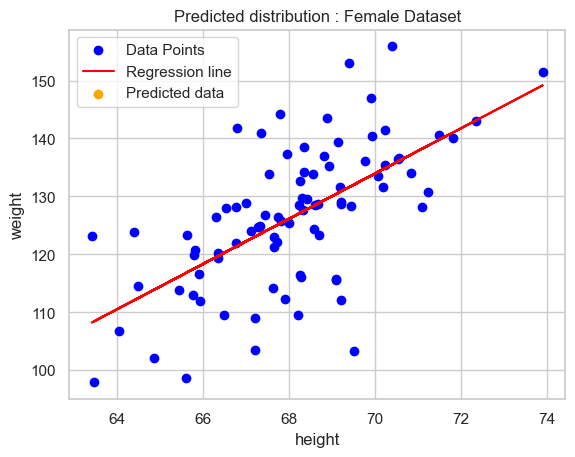

[]

[]


c:\Users\ksmin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


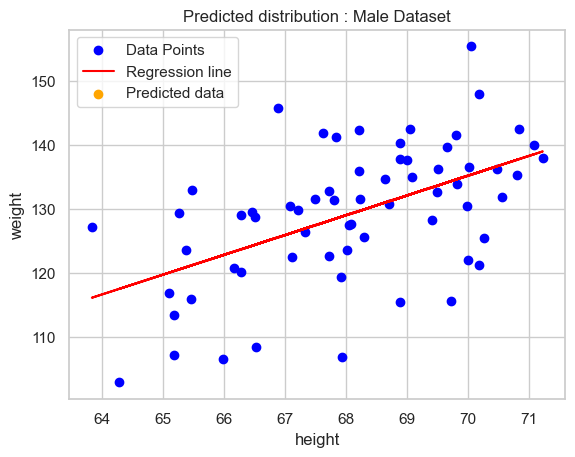

[]

[]


c:\Users\ksmin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


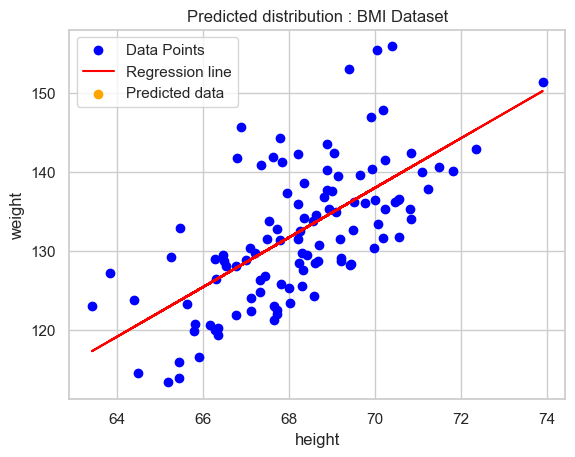

[]

[]


In [184]:
def plot_expected(df,model,h_indices,w_indices, name):
    X = df.loc[:, 'Height (Inches)'].values
    Y = df.loc[:, 'Weight (Pounds)'].values

    X = X.reshape(-1,1)
    Y = Y.reshape(-1,1)
    
    #Orange -> predict
    P_y = df.loc[h_indices,'Weight (Pounds)'].values 
    P_x = df.loc[h_indices,'Height (Inches)'].values

    P_x = np.append(P_x,df.loc[w_indices,'Height (Inches)'].values) 
    P_y = np.append(P_y,df.loc[w_indices,'Weight (Pounds)'].values)

    P_x = P_x.reshape(-1,1)
    P_y = P_y.reshape(-1,1)

    plt.scatter(X,Y, color = 'blue', label = 'Data Points')
    plt.plot(X, model.predict(X), color = 'red', label = 'Regression line') #regrssion line.
    plt.scatter(P_x,P_y, color = 'orange', label = 'Predicted data')

    plt.title("Predicted distribution : {}".format(name))
    plt.xlabel('height')
    plt.ylabel('weight')
    plt.legend()

    # print graph and expected P_x, P_y
    plt.show()
    print(P_x)
    print()
    print(P_y)

plot_expected(df,model,h_indices,w_indices, "Total Dataset")
plot_expected(female_df,model_female, h_indices_female,w_indices_female, "Female Dataset")
plot_expected(male_df,model_male,h_indices_male,w_indices_male, "Male Dataset")
plot_expected(obesity_df,model_obesity,h_indices_obesity,w_indices_obesity, "BMI Dataset")

In [185]:
#Check NaN to expected values
df.head(30)

,Sex,Age,Height (Inches),Weight (Pounds),BMI
0,1.0,21,65.783310,112.99250,2.0
1,1.0,35,70.548755,136.48730,3.0
2,1.0,27,69.398740,153.02690,3.0
3,0.0,24,68.216600,142.33540,3.0
4,1.0,18,67.787810,144.29710,3.0
5,1.0,22,68.697840,123.30240,2.0
6,0.0,35,69.802040,141.49470,NaN
7,0.0,19,70.014720,136.46230,3.0
8,1.0,28,67.902650,112.37230,2.0
9,0.0,25,66.170837,120.66720,3.0


In [186]:
df.isna().sum() #Outlier data were stored through predicted values and were originally processed as NaN values.

Sex                0
Age                0
Height (Inches)    0
Weight (Pounds)    0
BMI                5
dtype: int64